# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
!pip install fredapi > /dev/null

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key= '3621ab7c9162cfc5be5e59fbe2683785'



In [53]:
fred=Fred(fred_key)

In [54]:
sp_search=fred.search('S&P',order_by='popularity')

In [55]:
sp_search.shape

(1000, 15)

In [56]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

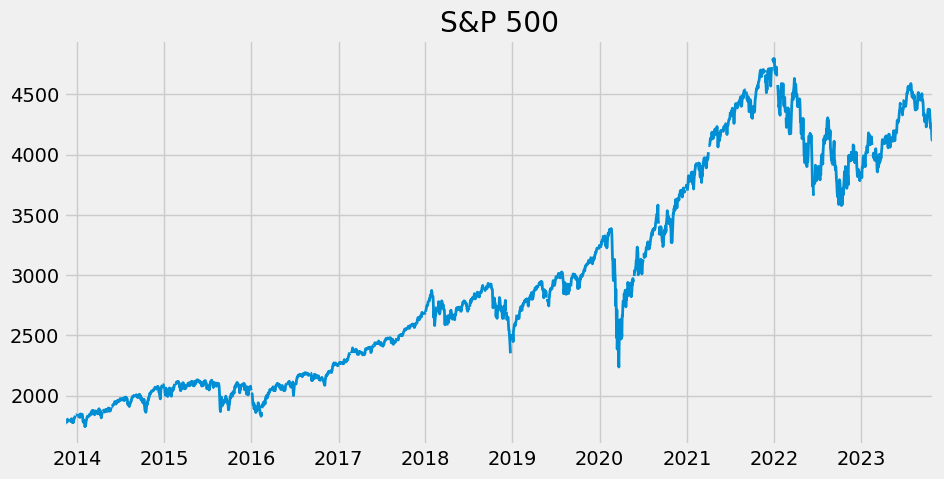

In [57]:
sp500.plot(figsize=(10,5), title='S&P 500',lw=2)

In [58]:
uemp_results=fred.search('unemployment')

In [59]:
unrate=fred.get_series('UNRATE')


<Axes: >

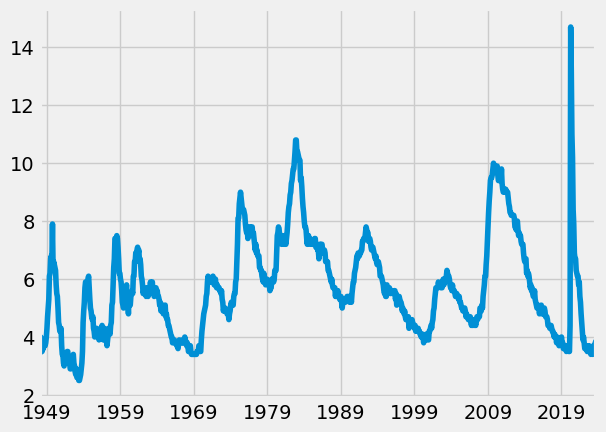

In [60]:
unrate.plot()

In [61]:
unemp_df=fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-07,2023-11-07,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-07,2023-11-07,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-07,2023-11-07,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,60,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-11-07,2023-11-07,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,52,Series Is Presented Here As Three Variables--(...
TXUR,TXUR,2023-11-07,2023-11-07,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,53,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000091,LNS14000091,2023-11-07,2023-11-07,Unemployment Rate - 35-44 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:46-05:00,3,The series comes from the 'Current Population ...
LNS14000029,LNS14000029,2023-11-07,2023-11-07,"Unemployment Rate - 20 Yrs. & over, White Women",1954-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:16-05:00,3,To obtain estimates of women worker employment...
CWSTUR,CWSTUR,2023-11-07,2023-11-07,Unemployment Rate in West Census Region,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:12-05:00,3,None


In [62]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

ValueError: Too Many Requests.  Exceeded Rate Limit

In [ ]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
px.line(uemp_states)

Unemployment VS Participation
